# Beautiful Soup
Biblioteka do Pythona.
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [ ]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup

Pobieramy html z zegluj.pl i wstępnie procesujemy przez Beautiful Soup.

Trzeba sprawdzić ile jest stron w wynikach, można to napisać ładnie, żeby samo się analizowało, na podstawie klasy disabled (lub jej braku) na elemencie następna strona.

In [ ]:
url = "https://zegluj.pl/mazury?date_from=01-05-2024&date_to=07-05-2024&page="

pages = []
for page_number in range(1, 18):
    print(f'Pobieranie strony {page_number}')
    with urllib.request.urlopen(f'{url}{page_number}') as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)


Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17


In [ ]:
pages[3]

<!DOCTYPE html>

<html lang="pl" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>⚓ Czarter jachtów Mazury 2024. Wynajem jachtów na Mazurach - zegluj.pl</title>
<meta content="Czarter jachtów Mazury - 2024. Jachty motorowe, houseboaty oraz żaglówki do czarteru na Mazurach. Porównaj ofertę 130 firm czarterowych, wybierz najlepszą ofertę. Na zegluj.pl znajdziesz najlepsze ceny czarterów oraz oferty last minute. Mazurskie jeziora" name="description"/>
<meta content="czarter, mazury" name="keywords"/>
<meta content="index, follow" name="robots"/>
<link href="https://zegluj.pl/mazury" rel="canonical"/>
<meta content="zegluj.pl | czartery jachtów. Porównaj oferty firm czarterowych. Rabaty do 30%." property="og:title"/>
<meta content="/assets/fb_zegluj-b6311e80fada9f469076f632f87ee111.jpg" property="og:image"/>
<meta content="Proste wyszukiwanie, szybka rezerwacja, intuicyjne określenie wolnych terminów, tylko dostępne oferty. Nowa jakość i wielkość oferty. Kochasz żeglarstwo? Znajdź coś d

Wyciągamy poszczególne boksy z łódkami




In [ ]:
full_yacht_data = []
for page in pages:

    full_yacht_data += page.find_all(class_='yacht-box')

In [ ]:
full_yacht_data

[<div class="yacht-box">
 <div class="row">
 <div class="col-md-4 yacht-box__column yacht-box__column--overflowed">
 <div class="yacht-box__image">
 <a href="/jacht/tango-780-family/279#/avail/date_from=01-05-2024/date_to=07-05-2024/"><img alt="Mazury czarter - Tango 780 Family" src="/system/yacht_cms_images/images/000/023/214/medium/tango-780-family-1688069181.jpg?1688069181"/>
 </a><div class="yacht-box__location">
 <blockquote>Wilkasy, port Hotel Tajty</blockquote>
 </div>
 </div>
 </div>
 <div class="col-md-8 yacht-box__column">
 <div class="yacht-box__content">
 <div class="row">
 <div class="col-sm-7 yacht-box-content__left">
 <div class="yacht-box__title">
 <h3 class="yacht-box__name">
 Tango 780 Family
 </h3>
 <div class="yacht-box__votescounter">
 <div id="details_more_info"></div>
 <a class="yacht-box__votes" href="/jacht/tango-780-family/279/yacht_reviews#/avail/date_from=01-05-2024/date_to=07-05-2024/" rel="nofollow" title="2 - tyle osób czarterowała i oceniła ten jacht"><d

Analizujemy dane i przygotowujemy słownik z danymi

In [ ]:
yachts_data = []
for yacht_html in full_yacht_data:
    yacht = {}
    yacht['name'] = yacht_html.find(class_="yacht-box__name").text.strip()
    yacht['price'] = float(yacht_html.find(class_="price right").span.contents[0].replace(' ', '').replace('zł', '').replace('PLN', ''))
    yacht['img'] = f"https://zegluj.pl{yacht_html.img['src']}"
    yacht['url'] = f"https://zegluj.pl{yacht_html.find(class_='yacht-box__image').a['href']}"
    # parameters
    for param_row in yacht_html.select('li.yacht-box-info__item'):
        param_data = param_row.find_all('div')
        param_type = param_data[0].text.strip()
        param_value = re.sub(r'\s+', '', param_data[1].text.strip())
        if 'osób' in param_type:
            #yacht['people'] = param_value
            try:
              yacht['people'] = int(param_value.split('-')[-1])
            except ValueError:
              yacht['people'] = None
        elif 'kabin' in param_type:
            try:
                yacht['cabins'] = int(param_value.split('-')[-1])
            except ValueError:
                yacht['cabins'] = None
            # yacht['cabins'] = int(param_value)
        elif 'produkcji' in param_type:
            yacht['year'] = param_value

    yachts_data.append(yacht)

In [ ]:
yachts_data

[{'name': 'Tango 780 Family',
  'price': 1152.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/023/214/medium/tango-780-family-1688069181.jpg?1688069181',
  'url': 'https://zegluj.pl/jacht/tango-780-family/279#/avail/date_from=01-05-2024/date_to=07-05-2024/',
  'people': 6,
  'cabins': 0,
  'year': '2011'},
 {'name': 'Sasanka 600 Viva',
  'price': 1160.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/004/595/medium/sasanka-600-viva-1668789784.jpg?1668789784',
  'url': 'https://zegluj.pl/jacht/sasanka-600-viva/657#/avail/date_from=01-05-2024/date_to=07-05-2024/',
  'people': 4,
  'cabins': 0,
  'year': '2020'},
 {'name': 'Tango 780 Sport',
  'price': 1260.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/023/269/medium/tango-780-sport-1688069219.jpg?1688069218',
  'url': 'https://zegluj.pl/jacht/tango-780-sport/268#/avail/date_from=01-05-2024/date_to=07-05-2024/',
  'people': 6,
  'cabins': 0,
  'year': '2010'},
 {'name': 'Phobos 24',
  

Możemy dalej analizować pozyskane dane.

In [ ]:
df = pd.DataFrame.from_dict(yachts_data)
df['cabins'].fillna(0, inplace=True)
df.head(5)

,name,price,img,url,people,cabins,year
0,Tango 780 Family,1152.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tango-780-family/279#/...,6,0.0,2011
1,Sasanka 600 Viva,1160.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-600-viva/657#/...,4,0.0,2020
2,Tango 780 Sport,1260.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tango-780-sport/268#/a...,6,0.0,2010
3,Phobos 24,1311.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/phobos-24/1351#/avail/...,6,0.0,2010
4,Kuter,1397.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/kuter/1242#/avail/date...,4,1.0,2005


array([[<Axes: title={'center': 'price'}>]], dtype=object)

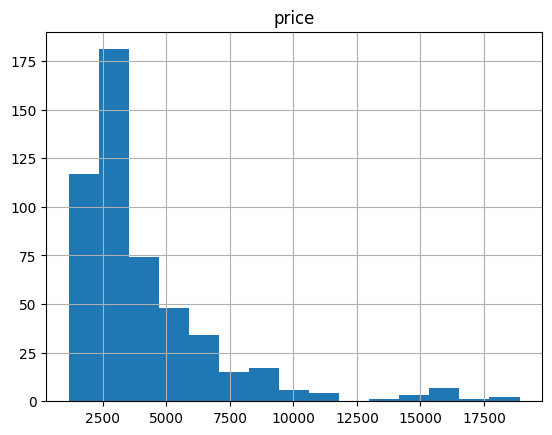

In [ ]:
df.hist(column='price', bins=15)

In [ ]:
df[ df.price > 17000 ] # 100_000

,name,price,img,url,people,cabins,year
435,Saxdor 320 GTO,18656.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/saxdor-320-gto/1778#/a...,6,1.0,2023
436,Sea Ray 265,18900.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-ray-265/1273#/avai...,8,0.0,2021


array([[<Axes: title={'center': 'price'}>]], dtype=object)

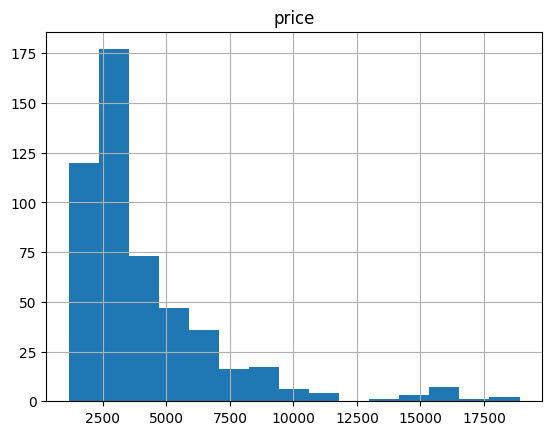

In [ ]:
df[ df.price <= 100000 ].hist(column='price', bins=15)

array([[<Axes: title={'center': 'people'}>]], dtype=object)

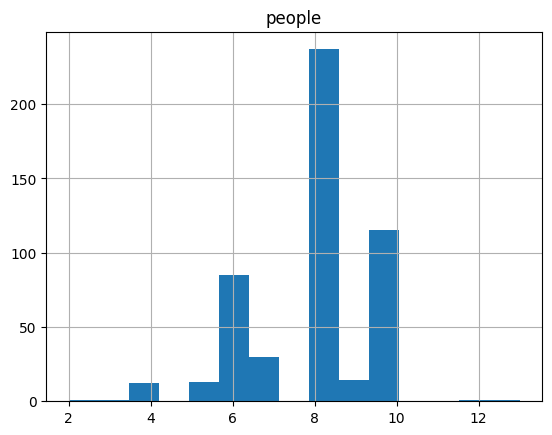

In [ ]:
df.hist(column='people', bins=15)

<Axes: xlabel='people', ylabel='price'>

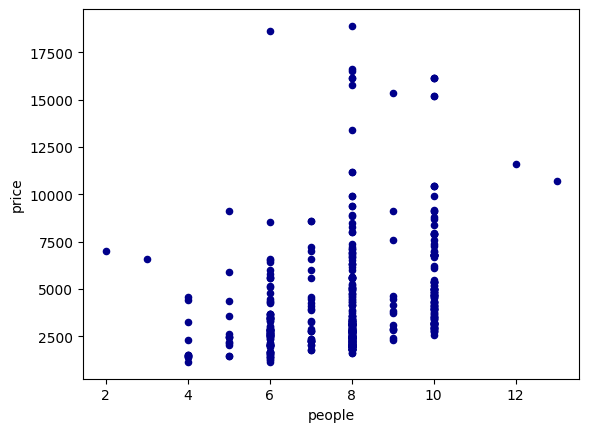

In [ ]:
df.plot.scatter(x='people', y='price', c='DarkBlue')

Kontynuacja zadania w ramach zadania domowego, pobranie szczegółowych danych dla kolejnych łódek

In [ ]:
yacht_data = []

def extract_number(param_data):
    num = re.search(r'\d+', param_data)
    return int(num.group()) if num else 0

for indeks, urls in enumerate(df['url']):

    yacht_info = {'lazienki': 0, 'liczba_koi': 0, 'kaucja': 0, 'oplata_za_sprzatanie': 0, 'cena_za_zwierzeta': 0, 'lustro': None, 'moc_silnika': 0, 'zanurzenie_min': 0, 'zanurzenie_max': 0, 'moc_silnika': 0}

    try:
      with urllib.request.urlopen(df['url'][indeks]) as resp:
          processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
    except Exception as e:
      print(e)
      continue

    yacht_summary = processed_page.find(class_='col-md-9 summary').find_all(class_='col-md-6')

    for section in yacht_summary:
        for param in section.find_all('div'):
            param_type, param_data = param.text.split(':')
            if 'uprawnienia' in param_type:
                yacht_info['uprawnienia'] = param_data.strip()

            param = re.sub(r'\s+', '', param.text.strip())
            param_type, param_data = param.split(':')

            if 'łazienki' in param_type:
                yacht_info['lazienki'] = int(param_data)
            elif 'liczbakoi' in param_type:
                yacht_info['liczba_koi'] = extract_number(param_data)
            elif 'kaucja' in param_type:
                yacht_info['kaucja'] = extract_number(param_data.split('PLN')[0])
            elif 'opłata' in param_type:
                yacht_info['oplata_za_sprzatanie'] = extract_number(param_data.split('PLN')[0])
            elif 'zwierzęta' in param_type:
                yacht_info['cena_za_zwierzeta'] = extract_number(param_data)

    yacht_equipment = processed_page.find(class_='tab-1').find(class_='row').select('div')[0]
    if re.search('Lustro', yacht_equipment.text.strip()) is not None:
        yacht_info['lustro'] = True

    yacht_technical_data = processed_page.find(class_='tab-2').find(class_='row').select('div')[0].select('div')
    for technical_data in yacht_technical_data:
        param_type, param_data = technical_data.text.split(':')
        if 'Zanurzenie min' in param_type:
            yacht_info['zanurzenie_min'] = extract_number(param_data)
        elif 'Zanurzenie max' in param_type:
            yacht_info['zanurzenie_max'] = extract_number(param_data)
        elif 'Moc silnika' in param_type:
            yacht_info['moc_silnika'] = extract_number(param_data)

    print(indeks, yacht_info)
    yacht_data.append(yacht_info)

NameError: name 'df' is not defined

Ukazanie w postaci tabeli danych dla pierwszych 100 łódek

In [ ]:
df1 = pd.DataFrame.from_dict(yacht_data)
df1 = df1.replace(0, "Brak")
df1['lustro'] = df1['lustro'].fillna(False)
df1.head(100)

,lazienki,liczba_koi,kaucja,oplata_za_sprzatanie,cena_za_zwierzeta,lustro,moc_silnika,zanurzenie_min,zanurzenie_max,uprawnienia
0,1,6,2000,200,200,False,Brak,35,145,Patent żeglarski
1,1,4,1500,180,200,False,4,30,130,Bez patentu
2,1,6,2000,200,200,False,Brak,35,145,Patent żeglarski
3,1,6,1500,180,150,False,6,27,140,Patent żeglarski
4,Brak,3,700,100,150,False,30,45,55,Bez patentu (wymagane doświadczenie)
...,...,...,...,...,...,...,...,...,...,...
95,1,8,1500,150,100,False,Brak,32,136,Patent żeglarski
96,1,4,1500,350,200,False,Brak,65,65,Bez patentu
97,1,6,1500,350,200,False,Brak,40,40,Bez patentu
98,1,9,2500,180,150,True,9,45,200,Patent żeglarski


Zestawienie przykładowych danych w wykresy oraz podsumowania

In [ ]:
df1[ df1.kaucja < 1000 ]

,lazienki,liczba_koi,kaucja,oplata_za_sprzatanie,cena_za_zwierzeta,lustro,moc_silnika,zanurzenie_min,zanurzenie_max,uprawnienia
4,Brak Informacji,3,700,100,150,False,30,45,55,Bez patentu (wymagane doświadczenie)
17,1,Brak Informacji,800,100,100,False,Brak Informacji,34,145,Patent żeglarski
18,1,8,800,100,100,False,Brak Informacji,38,150,Patent żeglarski
149,1,8,800,100,100,False,Brak Informacji,39,162,Patent żeglarski
441,1,8,900,200,200,False,4,35,135,Patent żeglarski


In [ ]:
df1[ df1.kaucja == df1['kaucja'].min() ]

,lazienki,liczba_koi,kaucja,oplata_za_sprzatanie,cena_za_zwierzeta,lustro,moc_silnika,zanurzenie_min,zanurzenie_max,uprawnienia
4,Brak Informacji,3,700,100,150,False,30,45,55,Bez patentu (wymagane doświadczenie)


In [ ]:
df1[ df1.kaucja > 7000 ]

,lazienki,liczba_koi,kaucja,oplata_za_sprzatanie,cena_za_zwierzeta,lustro,moc_silnika,zanurzenie_min,zanurzenie_max,uprawnienia
418,1,6,10000,200,200,False,Brak Informacji,61,102,Patent motorowodny
421,1,Brak Informacji,8000,200,Brak Informacji,False,250,Brak Informacji,92,Patent żeglarski


In [ ]:
df1[ df1.kaucja == df1['kaucja'].max() ]

,lazienki,liczba_koi,kaucja,oplata_za_sprzatanie,cena_za_zwierzeta,lustro,moc_silnika,zanurzenie_min,zanurzenie_max,uprawnienia
418,1,6,10000,200,200,False,Brak Informacji,61,102,Patent motorowodny


<Figure size 1000x600 with 0 Axes>

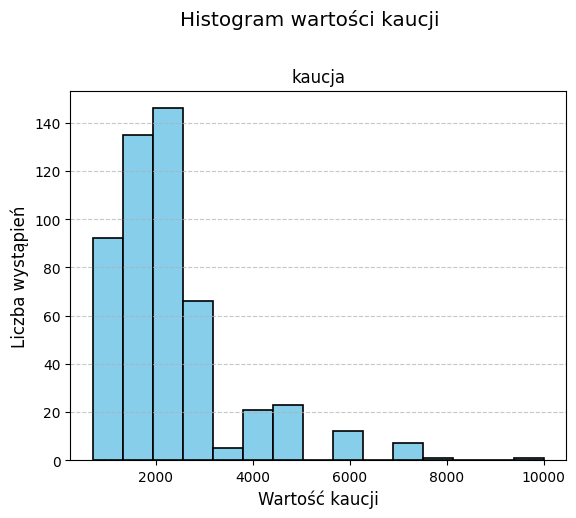

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = df1.hist(column='kaucja', bins=15, color='skyblue', edgecolor='black', linewidth=1.2, grid=False)

plt.suptitle('Histogram wartości kaucji', x=0.5, y=1.05, ha='center', fontsize='x-large')
plt.xlabel('Wartość kaucji', fontsize='large')
plt.ylabel('Liczba wystąpień', fontsize='large')


plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.show()

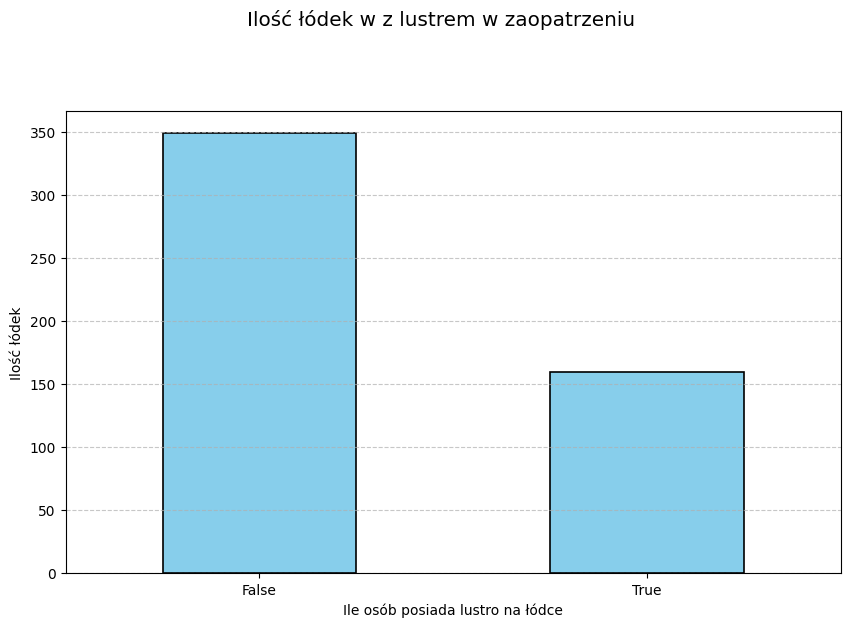

In [ ]:
plt.figure(figsize=(10, 6))
df1.groupby('lustro').size().plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2, grid=False)

plt.suptitle('Ilość łódek w z lustrem w zaopatrzeniu', x=0.5, y=1.05, ha='center', fontsize='x-large')
plt.xlabel('Ile osób posiada lustro na łódce')
plt.ylabel('Ilość łódek')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.show()

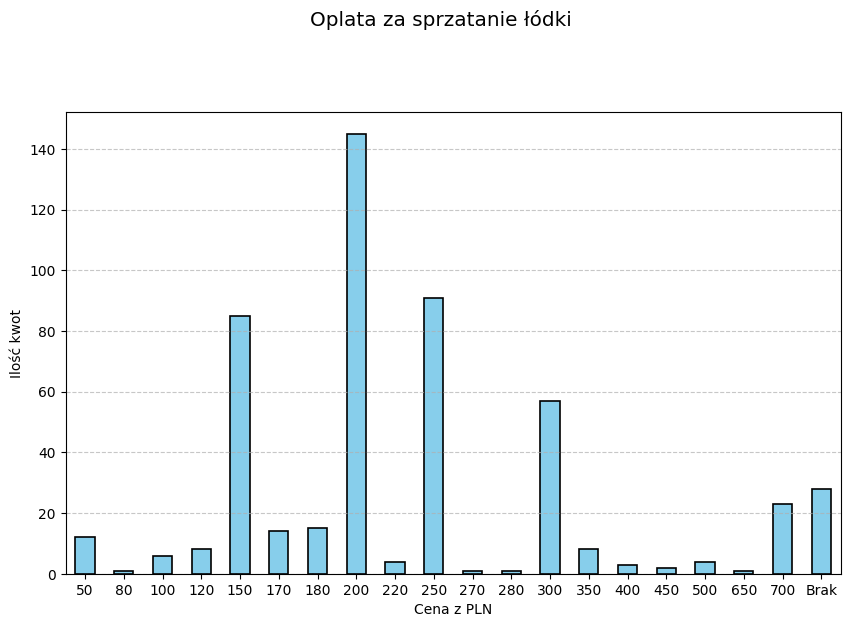

In [ ]:
plt.figure(figsize=(10, 6))
df1.groupby('oplata_za_sprzatanie').size().plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2, grid=False)

plt.suptitle('Oplata za sprzatanie łódki', x=0.5, y=1.05, ha='center', fontsize='x-large')
plt.xlabel('Cena z PLN')
plt.ylabel('Ilość kwot')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.show()